## DataSet - Supermart_Grocery_Sales

### Problem Statment :-The purpose of this analysis is to identify trends and pattern of sales by Supermart Grocery. This analysis will be done using numPy, pandas, matplotlib and seaborn libraries in python programming language.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
import seaborn as sns
import numpy as np


In [16]:
SupermartSales_df = pd.read_csv(r"C:\Users\vedpa\Downloads\archive (4)\Supermart Grocery Sales - Retail Analytics Dataset.csv")

In [17]:
SupermartSales_df.head(10)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
5,OD6,Adavan,Food Grains,Organic Staples,Dharmapuri,06-09-2015,West,2305,0.26,322.70,Tamil Nadu
6,OD7,Jonas,Fruits & Veggies,Fresh Vegetables,Trichy,06-09-2015,West,826,0.33,346.92,Tamil Nadu
7,OD8,Hafiz,Fruits & Veggies,Fresh Fruits,Ramanadhapuram,06-09-2015,West,1847,0.32,147.76,Tamil Nadu
8,OD9,Hafiz,Bakery,Biscuits,Tirunelveli,06-09-2015,West,791,0.23,181.93,Tamil Nadu
9,OD10,Krithika,Bakery,Cakes,Chennai,06-09-2015,West,1795,0.27,484.65,Tamil Nadu


In [20]:
SupermartSales_df.shape

(9994, 11)

In [21]:
SupermartSales_df.columns

Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')

In [22]:
SupermartSales_df.rename(columns = {'Order ID':'Order_ID' , 'Customer Name':'Customer_Name','Sub Category':'Sub_Category','Order Date':'Order_Date',},inplace= True)

In [23]:
SupermartSales_df.head(1)

,Order_ID,Customer_Name,Category,Sub_Category,City,Order_Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu


## numerical data

In [24]:
SupermartSales_df.describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


 ### column names, total number of columns, datatypes

In [25]:
SupermartSales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order_ID       9994 non-null   object 
 1   Customer_Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub_Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order_Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [26]:
from datetime import datetime
SupermartSales_df.Order_Date = pd.to_datetime(SupermartSales_df.Order_Date)
SupermartSales_df.Order_Date

0      2017-11-08
1      2017-11-08
2      2017-06-12
3      2016-10-11
4      2016-10-11
          ...    
9989   2015-12-24
9990   2015-07-12
9991   2017-06-06
9992   2018-10-16
9993   2018-04-17
Name: Order_Date, Length: 9994, dtype: datetime64[ns]

### relationship between the sales pattern by weekdays and also by months.

In [27]:
SupermartSales_df['Year'] = pd.DatetimeIndex(SupermartSales_df.Order_Date).year
SupermartSales_df['Month'] = pd.DatetimeIndex(SupermartSales_df.Order_Date).month
SupermartSales_df['Day'] = pd.DatetimeIndex(SupermartSales_df.Order_Date).day
SupermartSales_df['Weekday'] = pd.DatetimeIndex(SupermartSales_df.Order_Date).weekday
SupermartSales_df

,Order_ID,Customer_Name,Category,Sub_Category,City,Order_Date,Region,Sales,Discount,Profit,State,Year,Month,Day,Weekday
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,2017,11,8,2
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,2017,11,8,2
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu,2017,6,12,0
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu,2016,10,11,1
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu,2016,10,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,2015-12-24,West,945,0.16,359.10,Tamil Nadu,2015,12,24,3
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,2015-07-12,West,1195,0.26,71.70,Tamil Nadu,2015,7,12,6
9991,OD9992,Ravi,Food Grains,Rice,Bodi,2017-06-06,West,1567,0.16,501.44,Tamil Nadu,2017,6,6,1
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,2018-10-16,West,1659,0.15,597.24,Tamil Nadu,2018,10,16,1


In [28]:
SupermartSales_df['Category'].unique()

array(['Oil & Masala', 'Beverages', 'Food Grains', 'Fruits & Veggies',
       'Bakery', 'Snacks', 'Eggs, Meat & Fish'], dtype=object)

In [29]:
SupermartSales_df['Region'].unique()

array(['North', 'South', 'West', 'Central', 'East'], dtype=object)

In [30]:
no_duplicates = SupermartSales_df.drop_duplicates()

## missing data 

In [31]:
SupermartSales_df.isnull().values.any()

False

In [32]:
SupermartSales_df['Order_ID'].str.contains('^OD').all()

True

## Analysis and Visualization

In [33]:
sns.set_style("darkgrid", {"grid.color": ".3", "grid.linestyle": ":"})

#  Find Out the trend in Sales for four years present in the Supermart Dataset

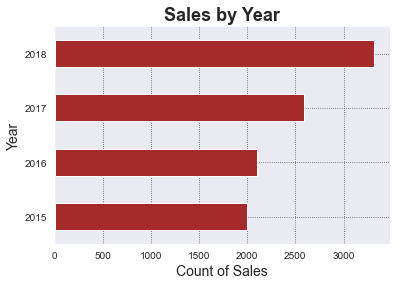

In [34]:
SalesbyYear = SupermartSales_df.groupby('Year') [['Sales']].count().sort_values(by = 'Sales', ascending = True)
SalesbyYear.plot(kind ='barh', legend = False, color = 'brown')
plt.title('Sales by Year', fontweight = 'bold', fontsize = 18)
plt.xlabel('Count of Sales', fontsize = 14)
plt.ylabel('Year', fontsize = 14);

# Monthly

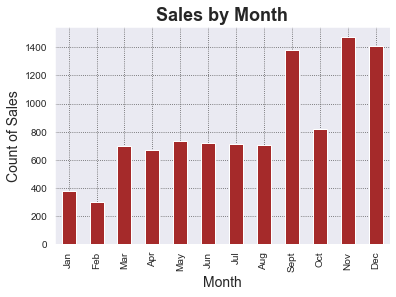

In [35]:
SalesbyMonth = SupermartSales_df.groupby('Month') [['Sales']].count()
SalesbyMonth.plot(kind ='bar', legend = False, color = 'brown')
plt.xticks((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11), ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'))
plt.title('Sales by Month', fontweight = 'bold', fontsize = 18)
plt.xlabel('Month', fontsize = 14)
plt.ylabel('Count of Sales', fontsize = 14);

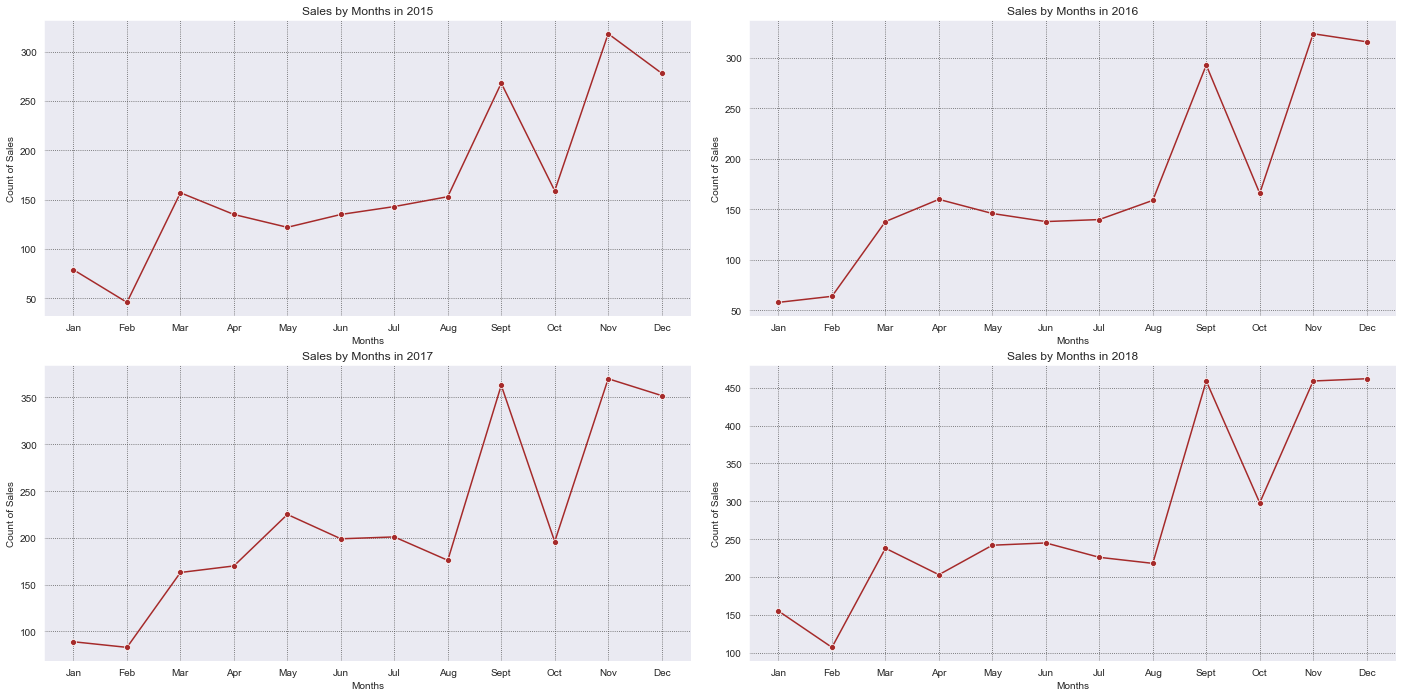

In [71]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
plt.tight_layout(pad = 3)


Salesin2015 = SupermartSales_df.loc[SupermartSales_df['Year'] == 2015]
Salesin2015_df = Salesin2015.groupby('Month') [['Sales']].count()
Salesin2015_df.index = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov", "Dec"]
axes[0,0].set_title('Sales by Months in 2015')
axes[0,0].set_xlabel('Months', fontsize = 10)
axes[0,0].set_ylabel('Count of Sales', fontsize = 10)
sns.lineplot(x=Salesin2015_df.index, y=Salesin2015_df.Sales, color = 'brown', marker='o', ax=axes[0,0]);


Salesin2016 = SupermartSales_df.loc[SupermartSales_df['Year'] == 2016]
Salesin2016_df = Salesin2016.groupby('Month') [['Sales']].count()
Salesin2016_df.index = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov", "Dec"]
axes[0,1].set_title('Sales by Months in 2016')
axes[0,1].set_xlabel('Months', fontsize = 10)
axes[0,1].set_ylabel('Count of Sales', fontsize = 10)
sns.lineplot(x=Salesin2016_df.index, y=Salesin2016_df.Sales, color = 'brown', marker='o', ax=axes[0,1]);


Salesin2017 = SupermartSales_df.loc[SupermartSales_df['Year'] == 2017]
Salesin2017_df = Salesin2017.groupby('Month') [['Sales']].count()
Salesin2017_df.index = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov", "Dec"]
axes[1,0].set_title('Sales by Months in 2017')
axes[1,0].set_xlabel('Months', fontsize = 10)
axes[1,0].set_ylabel('Count of Sales', fontsize = 10)
sns.lineplot(x=Salesin2017_df.index, y=Salesin2017_df.Sales, color = 'brown', marker='o', ax=axes[1,0]);


Salesin2018 = SupermartSales_df.loc[SupermartSales_df['Year'] == 2018]
Salesin2018_df = Salesin2018.groupby('Month') [['Sales']].count()
Salesin2018_df.index = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov", "Dec"]
axes[1,1].set_title('Sales by Months in 2018')
axes[1,1].set_xlabel('Months', fontsize = 10)
axes[1,1].set_ylabel('Count of Sales', fontsize = 10)
sns.lineplot(x=Salesin2018_df.index, y=Salesin2018_df.Sales, color = 'brown', marker='o', ax=axes[1,1]);



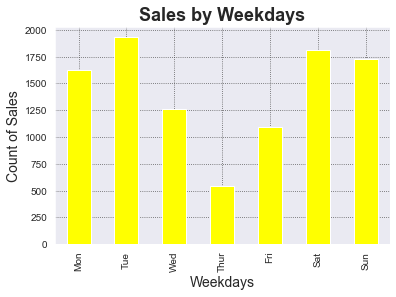

In [37]:
SalesbyWeekday = SupermartSales_df.groupby('Weekday') [['Sales']].count()
SalesbyWeekday.plot(kind ='bar', legend = False, color = 'yellow')
plt.xticks((0, 1, 2, 3, 4, 5, 6,), ('Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'))
plt.title('Sales by Weekdays', fontweight = 'bold', fontsize = 18)
plt.xlabel('Weekdays', fontsize = 14)
plt.ylabel('Count of Sales', fontsize = 14);

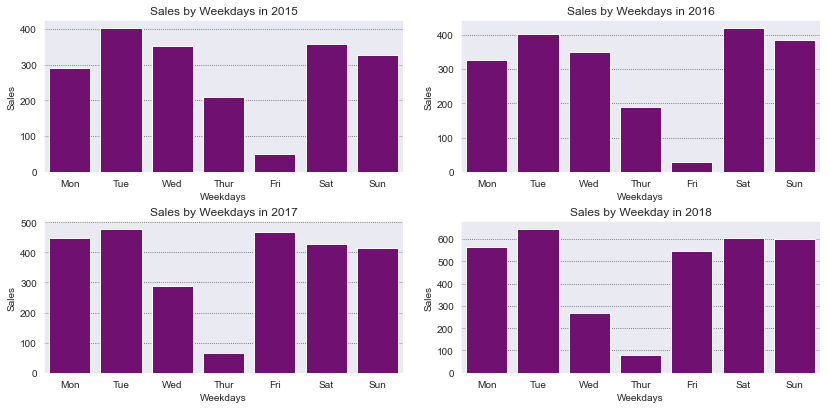

In [38]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))
plt.tight_layout(pad = 3)

Salesin2015 = SupermartSales_df.loc[SupermartSales_df['Year'] == 2015]
SalesbyWeekday2015_df = Salesin2015.groupby('Weekday') [['Sales']].count()
SalesbyWeekday2015_df.index = ["Mon", "Tue", "Wed", "Thur", "Fri", "Sat", "Sun"]
axes[0,0].set_title('Sales by Weekdays in 2015')
axes[0,0].set_xlabel('Weekdays', fontsize = 10)
axes[0,0].set_ylabel('Count of Sales', fontsize = 10)
sns.barplot(x=SalesbyWeekday2015_df.index, y=SalesbyWeekday2015_df.Sales, color='purple', palette=None, ax=axes[0,0]);


Salesin2016 = SupermartSales_df.loc[SupermartSales_df['Year'] == 2016]
SalesbyWeekday2016_df = Salesin2016.groupby('Weekday') [['Sales']].count()
SalesbyWeekday2016_df.index = ["Mon", "Tue", "Wed", "Thur", "Fri", "Sat", "Sun"]
axes[0,1].set_title('Sales by Weekdays in 2016')
axes[0,1].set_xlabel('Weekdays', fontsize = 10)
axes[0,1].set_ylabel('Count of Sales', fontsize = 10)
sns.barplot(x=SalesbyWeekday2016_df.index, y=SalesbyWeekday2016_df.Sales, color='purple', palette=None, ax=axes[0,1]);


Salesin2017 = SupermartSales_df.loc[SupermartSales_df['Year'] == 2017]
SalesbyWeekday2017_df = Salesin2017.groupby('Weekday') [['Sales']].count()
SalesbyWeekday2017_df.index = ["Mon", "Tue", "Wed", "Thur", "Fri", "Sat", "Sun"]
axes[1,0].set_title('Sales by Weekdays in 2017')
axes[1,0].set_xlabel('Weekdays', fontsize = 10)
axes[1,0].set_ylabel('Count of Sales', fontsize = 10)
sns.barplot(x=SalesbyWeekday2017_df.index, y=SalesbyWeekday2017_df.Sales, color='purple', palette=None, ax=axes[1,0]);



Salesin2018 = SupermartSales_df.loc[SupermartSales_df['Year'] == 2018]
SalesbyWeekday2018_df = Salesin2018.groupby('Weekday') [['Sales']].count()
SalesbyWeekday2018_df.index = ["Mon", "Tue", "Wed", "Thur", "Fri", "Sat", "Sun"]
axes[1,1].set_title('Sales by Weekday in 2018')
axes[1,1].set_xlabel('Weekdays', fontsize = 10)
axes[1,1].set_ylabel('Count of Sales', fontsize = 10)
sns.barplot(x=SalesbyWeekday2018_df.index, y=SalesbyWeekday2018_df.Sales, color='purple', palette=None, ax=axes[1,1]);


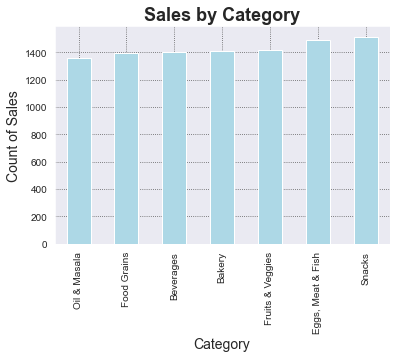

In [39]:
SalesbyCategory = SupermartSales_df.groupby('Category') [['Sales']].count().sort_values(by = "Sales", ascending = True)
SalesbyCategory.plot(kind ='bar', legend = False, color = 'lightblue')
plt.title('Sales by Category', fontweight = 'bold', fontsize = 18)
plt.xlabel('Category', fontsize = 14)
plt.ylabel('Count of Sales', fontsize = 14);

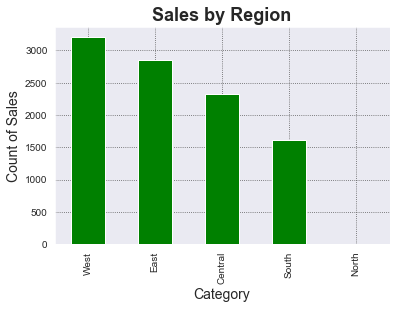

In [40]:
SalesbyRegion = SupermartSales_df.groupby('Region') [['Order_ID']].count().sort_values(by = "Order_ID", ascending = False)
SalesbyRegion.plot(kind ='bar', legend = False, color = 'green')
plt.title('Sales by Region', fontweight = 'bold', fontsize = 18)
plt.xlabel('Category', fontsize = 14)
plt.ylabel('Count of Sales', fontsize = 14);

## To view Sales by Sub_Category for different Regions.

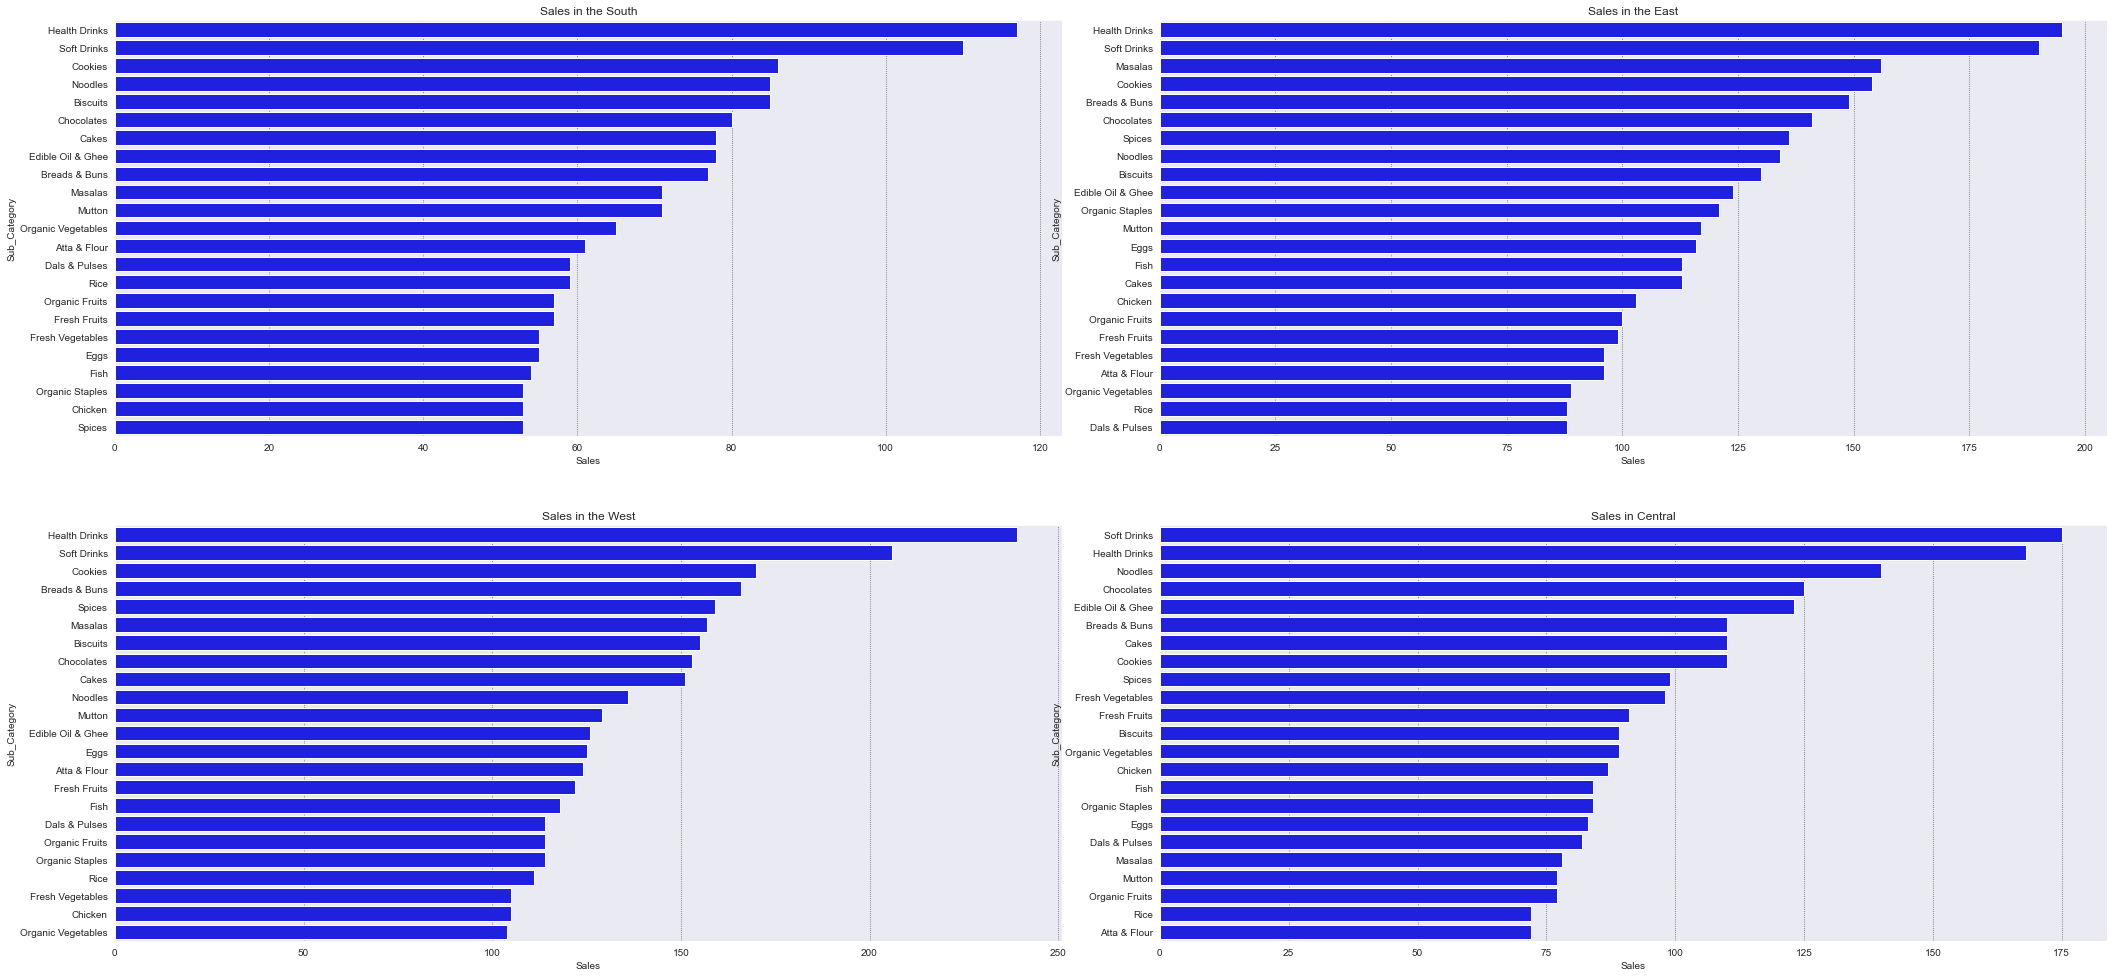

In [41]:
# To view Sales by Sub_Category for different Regions.
fig, axes = plt.subplots(2, 2, figsize=(30, 15))
plt.tight_layout(pad = 7)

SalesinSouth = SupermartSales_df.loc[SupermartSales_df['Region'] == 'South']
SalesinSouth_df = SalesinSouth.groupby('Sub_Category') [['Sales']].count().sort_values(by = "Sales", ascending = False)
axes[0,0].set_title('Sales in the South')
sns.barplot(x=SalesinSouth_df.Sales, y=SalesinSouth_df.index, orient ='h',  color='blue', palette=None,  ax=axes[0,0]);


SalesinEast = SupermartSales_df.loc[SupermartSales_df['Region'] == 'East']
SalesinEast_df = SalesinEast.groupby('Sub_Category') [['Sales']].count().sort_values(by = "Sales", ascending = False)
axes[0,1].set_title('Sales in the East')
sns.barplot(x=SalesinEast_df.Sales, y=SalesinEast_df.index, orient ='h',  color='blue', palette=None, ax=axes[0,1]);


SalesinWest = SupermartSales_df.loc[SupermartSales_df['Region'] == 'West']
SalesinWest_df = SalesinWest.groupby('Sub_Category') [['Sales']].count().sort_values(by = "Sales", ascending = False)
axes[1,0].set_title('Sales in the West')
sns.barplot(x=SalesinWest_df.Sales, y=SalesinWest_df.index, orient ='h',  color='blue', palette=None, ax=axes[1,0]);


SalesinCentral = SupermartSales_df.loc[SupermartSales_df['Region'] == 'Central']
SalesinCentral_df = SalesinCentral.groupby('Sub_Category') [['Sales']].count().sort_values(by = "Sales", ascending = False)
axes[1,1].set_title('Sales in Central')
sns.barplot(x=SalesinCentral_df.Sales, y=SalesinCentral_df.index, orient ='h', color='blue', palette=None, ax=axes[1,1]);


In [42]:
TopTenCities = SupermartSales_df.groupby('City') [['Order_ID']].count().sort_values(by='Order_ID', ascending = False).head(20)
TopTenCities

,Order_ID
City,
Kanyakumari,459
Tirunelveli,446
Bodi,442
Krishnagiri,440
Vellore,435
Perambalur,434
Tenkasi,432
Chennai,432
Salem,431


### Questions

### What is the trend of sales across the years?

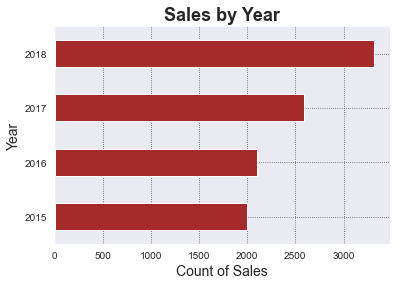

In [43]:
SalesbyYear.plot(kind ='barh', legend = False, color = 'brown')
plt.title('Sales by Year', fontweight = 'bold', fontsize = 18)
plt.xlabel('Count of Sales', fontsize = 14)
plt.ylabel('Year', fontsize = 14);

### Which category of items do people prefer the most

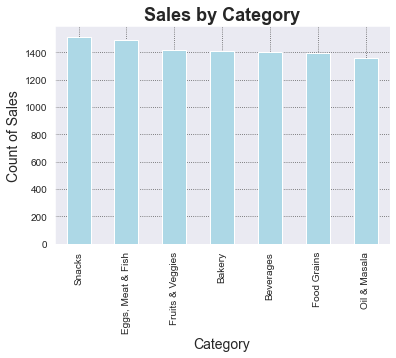

In [44]:
SalesbyCategory = SupermartSales_df.groupby('Category') [['Sales']].count().sort_values(by = "Sales", ascending = False)
SalesbyCategory.plot(kind ='bar', legend = False, color = 'lightblue')
plt.title('Sales by Category', fontweight = 'bold', fontsize = 18)
plt.xlabel('Category', fontsize = 14)
plt.ylabel('Count of Sales', fontsize = 14);

### Are there patterns in sales trend across the months?

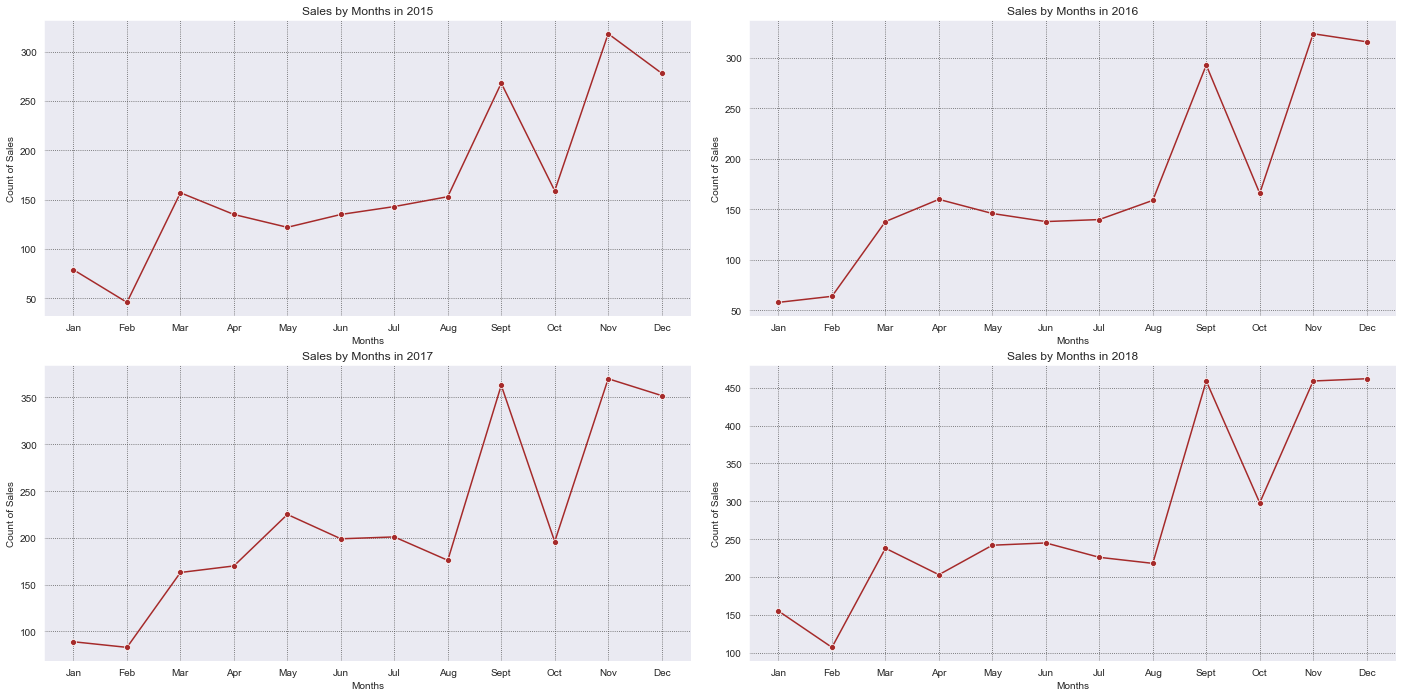

In [45]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
plt.tight_layout(pad = 3)

Salesin2015 = SupermartSales_df.loc[SupermartSales_df['Year'] == 2015]
Salesin2015_df = Salesin2015.groupby('Month') [['Sales']].count()
Salesin2015_df.index = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov", "Dec"]
axes[0,0].set_title('Sales by Months in 2015')
axes[0,0].set_xlabel('Months', fontsize = 10)
axes[0,0].set_ylabel('Count of Sales', fontsize = 10)
sns.lineplot(x=Salesin2015_df.index, y=Salesin2015_df.Sales, color = 'brown', marker='o', ax=axes[0,0]);


Salesin2016 = SupermartSales_df.loc[SupermartSales_df['Year'] == 2016]
Salesin2016_df = Salesin2016.groupby('Month') [['Sales']].count()
Salesin2016_df.index = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov", "Dec"]
axes[0,1].set_title('Sales by Months in 2016')
axes[0,1].set_xlabel('Months', fontsize = 10)
axes[0,1].set_ylabel('Count of Sales', fontsize = 10)
sns.lineplot(x=Salesin2016_df.index, y=Salesin2016_df.Sales, color = 'brown', marker='o', ax=axes[0,1]);

Salesin2017 = SupermartSales_df.loc[SupermartSales_df['Year'] == 2017]
Salesin2017_df = Salesin2017.groupby('Month') [['Sales']].count()
Salesin2017_df.index = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov", "Dec"]
axes[1,0].set_title('Sales by Months in 2017')
axes[1,0].set_xlabel('Months', fontsize = 10)
axes[1,0].set_ylabel('Count of Sales', fontsize = 10)
sns.lineplot(x=Salesin2017_df.index, y=Salesin2017_df.Sales, color = 'brown', marker='o', ax=axes[1,0]);

Salesin2018 = SupermartSales_df.loc[SupermartSales_df['Year'] == 2018]
Salesin2018_df = Salesin2018.groupby('Month') [['Sales']].count()
Salesin2018_df.index = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov", "Dec"]
axes[1,1].set_title('Sales by Months in 2018')
axes[1,1].set_xlabel('Months', fontsize = 10)
axes[1,1].set_ylabel('Count of Sales', fontsize = 10)
sns.lineplot(x=Salesin2018_df.index, y=Salesin2018_df.Sales, color = 'brown', marker='o', ax=axes[1,1]);

### Are there patterns in sales trend across the weekdays?

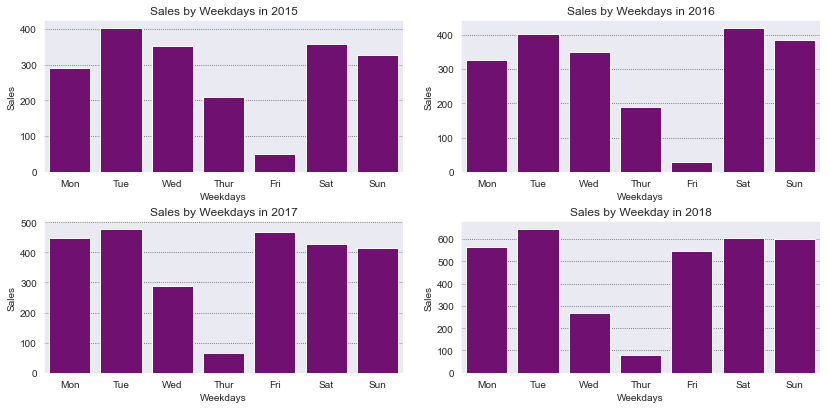

In [46]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))
plt.tight_layout(pad = 3)

Salesin2015 = SupermartSales_df.loc[SupermartSales_df['Year'] == 2015]
SalesbyWeekday2015_df = Salesin2015.groupby('Weekday') [['Sales']].count()
SalesbyWeekday2015_df.index = ["Mon", "Tue", "Wed", "Thur", "Fri", "Sat", "Sun"]
axes[0,0].set_title('Sales by Weekdays in 2015')
axes[0,0].set_xlabel('Weekdays', fontsize = 10)
axes[0,0].set_ylabel('Count of Sales', fontsize = 10)
sns.barplot(x=SalesbyWeekday2015_df.index, y=SalesbyWeekday2015_df.Sales, color='purple', palette=None, ax=axes[0,0]);


Salesin2016 = SupermartSales_df.loc[SupermartSales_df['Year'] == 2016]
SalesbyWeekday2016_df = Salesin2016.groupby('Weekday') [['Sales']].count()
SalesbyWeekday2016_df.index = ["Mon", "Tue", "Wed", "Thur", "Fri", "Sat", "Sun"]
axes[0,1].set_title('Sales by Weekdays in 2016')
axes[0,1].set_xlabel('Weekdays', fontsize = 10)
axes[0,1].set_ylabel('Count of Sales', fontsize = 10)
sns.barplot(x=SalesbyWeekday2016_df.index, y=SalesbyWeekday2016_df.Sales, color='purple', palette=None, ax=axes[0,1]);


Salesin2017 = SupermartSales_df.loc[SupermartSales_df['Year'] == 2017]
SalesbyWeekday2017_df = Salesin2017.groupby('Weekday') [['Sales']].count()
SalesbyWeekday2017_df.index = ["Mon", "Tue", "Wed", "Thur", "Fri", "Sat", "Sun"]
axes[1,0].set_title('Sales by Weekdays in 2017')
axes[1,0].set_xlabel('Weekdays', fontsize = 10)
axes[1,0].set_ylabel('Count of Sales', fontsize = 10)
sns.barplot(x=SalesbyWeekday2017_df.index, y=SalesbyWeekday2017_df.Sales, color='purple', palette=None, ax=axes[1,0]);


Salesin2018 = SupermartSales_df.loc[SupermartSales_df['Year'] == 2018]
SalesbyWeekday2018_df = Salesin2018.groupby('Weekday') [['Sales']].count()
SalesbyWeekday2018_df.index = ["Mon", "Tue", "Wed", "Thur", "Fri", "Sat", "Sun"]
axes[1,1].set_title('Sales by Weekday in 2018')
axes[1,1].set_xlabel('Weekdays', fontsize = 10)
axes[1,1].set_ylabel('Count of Sales', fontsize = 10)
sns.barplot(x=SalesbyWeekday2018_df.index, y=SalesbyWeekday2018_df.Sales, color='purple', palette=None, ax=axes[1,1]);

### From which region of the state did the most orders come from?

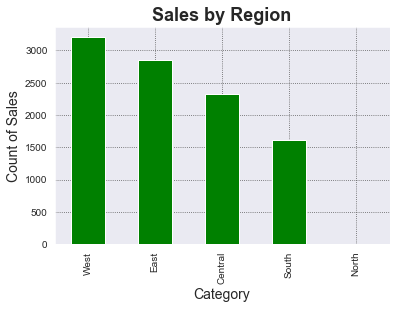

In [47]:
SalesbyRegion.plot(kind ='bar', legend = False, color = 'green')
plt.title('Sales by Region', fontweight = 'bold', fontsize = 18)
plt.xlabel('Category', fontsize = 14)
plt.ylabel('Count of Sales', fontsize = 14);

###  What are the top ten cities from which orders were made?

In [48]:
TopTenCities = SupermartSales_df.groupby('City') [['Order_ID']].count().sort_values(by='Order_ID', ascending = False).head(20)
TopTenCities

,Order_ID
City,
Kanyakumari,459
Tirunelveli,446
Bodi,442
Krishnagiri,440
Vellore,435
Perambalur,434
Tenkasi,432
Chennai,432
Salem,431


### Find City Has The Most Order of Health Drink & Fresh Vegetable

In [57]:
health = SupermartSales_df[(SupermartSales_df['Sub_Category'] == 'Health Drinks') | (SupermartSales_df['Sub_Category'] == 'Fresh Vegetables')]

health = SupermartSales_df.pivot_table(index = 'City', values ='Order_ID',
                              aggfunc = 'count').sort_values(by='Order_ID', ascending = False)
health.head(5)

,Order_ID
City,
Kanyakumari,459
Tirunelveli,446
Bodi,442
Krishnagiri,440
Vellore,435


###  How many the region with least Sales record the least Profit?

In [60]:
sales_orders_region = pd.pivot_table(data=SupermartSales_df, index='Region', values=['Order_ID', 'Sales', 'Profit'], 
               aggfunc = {'Order_ID':'count', 'Sales':'sum', 'Profit':'sum'}).reset_index().sort_values(by='Sales', ascending=False)
sales_orders_region['Sales Per Order'] = sales_orders_region['Sales']/sales_orders_region['Order_ID']
sales_orders_region['Profit Per Order'] = sales_orders_region['Profit']/sales_orders_region['Order_ID']
sales_orders_region[['Region', 'Sales Per Order', 'Profit Per Order']]

,Region,Sales Per Order,Profit Per Order
4,West,1498.202623,372.152548
1,East,1491.702247,377.228083
0,Central,1492.964270,368.836350
3,South,1507.387894,385.153113
2,North,1254.000000,401.280000


### Which city has the more Chicken & Mutton lovers?

In [64]:
 mutton = SupermartSales_df[(SupermartSales_df['Sub_Category'] == 'Mutton') | (SupermartSales_df['Sub_Category'] == 'Chicken')]

mutton_pivot = pd.pivot_table(data=mutton, index='City', 
                               values='Order_ID', aggfunc='count').sort_values(by='Order_ID', ascending=False)
mutton_pivot.head(1)

,Order_ID
City,
Kanyakumari,44


### Name three cities which have the highest Sales/Customers for Cakes and Chocolates

In [69]:
chocolate_cakes = SupermartSales_df[(SupermartSales_df['Sub_Category'] == 'Cakes') | (SupermartSales_df['Sub_Category'] == 'Chocolates')]

avg_sales_per_customer = pd.pivot_table(data=chocolate_cakes, index='City', values=['Sales', 'Customer_Name'], 
               aggfunc = {'Customer_Name':'count', 'Sales':'sum'}).reset_index()
avg_sales_per_customer['Sales Per Customer'] = round(avg_sales_per_customer['Sales']/avg_sales_per_customer['Customer_Name'], 2)
avg_sales_per_customer[['City','Sales Per Customer']].sort_values(by='Sales Per Customer', ascending=False).head(3)

,City,Sales Per Customer
16,Salem,1717.91
20,Trichy,1714.26
11,Namakkal,1625.75


# Conclusions

 ## 1.Data shows that the most sales came from the snacks category
 ## 2.Supermart Grocery Sales shoule for an increase in sales for the coming year. 
 ## 3.the store should consider hiring more staff for the months of September, November and December on a temporary contract basis.
 ## 4.More dispatch riders should be assigned to the top 10 City to fast delivery of customers' orders.   